In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#df=pd.read_csv("C:\\Users\\Dell\\Downloads\\Life Expectancy Data.csv")

In [5]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_53fd9f6537bb43d498561a6ddb2cfee1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='NwQ7mR7YxkfDzi1GC098ULjMHDxH4Z8y6Ukv1vduMzmA',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_53fd9f6537bb43d498561a6ddb2cfee1.get_object(Bucket='lifeexpectancymodel-donotdelete-pr-xtird3esqfyhqz',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df= pd.read_csv(body)
df.head()


Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [7]:
df.dropna(inplace=True)
df['Life expectancy ']=df['Life expectancy '].astype(int,copy=True)


In [8]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  1649.000000       1649.000000      1649.000000    1649.000000   
mean   2007.840509         68.907216       168.215282      32.553062   
std       4.087711          8.826497       125.310417     120.847190   
min    2000.000000         44.000000         1.000000       0.000000   
25%    2005.000000         64.000000        77.000000       1.000000   
50%    2008.000000         71.000000       148.000000       3.000000   
75%    2011.000000         75.000000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1600.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   
min       0.010000                0.000000     2.000000       0.000000   
25%       0.810000               37.438577    74.000000       0.000000   
50%       3.790000              145.102253    89.000000      15.000000   
75%       7.340000              509.389994    96.000000     373.000000   
max      17.870000            18961.348600    99.000000  131441.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  1649.000000         1649.000000  1649.000000        1649.000000   
mean     38.128623           44.220133    83.564585           5.955925   
std      19.754249          162.897999    22.450557           2.299385   
min       2.000000            0.000000     3.000000           0.740000   
25%      19.500000            1.000000    81.000000           4.410000   
50%      43.700000            4.000000    93.000000           5.840000   
75%      55.800000           29.000000    97.000000           7.470000   
max      77.100000         2100.000000    99.000000          14.390000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  1649.000000  1649.000000    1649.000000  1.649000e+03   
mean     84.155246     1.983869    5566.031887  1.465363e+07   
std      21.579193     6.032360   11475.900117  7.046039e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      82.000000     0.100000     462.149650  1.918970e+05   
50%      92.000000     0.100000    1592.572182  1.419631e+06   
75%      97.000000     0.700000    4718.512910  7.658972e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            1649.000000          1649.000000   
mean                4.850637             4.907762   
std                 4.599228             4.653757   
min                 0.100000             0.100000   
25%                 1.600000             1.700000   
50%                 3.000000             3.200000   
75%                 7.100000             7.100000   
max                27.200000            28.200000   

       Income composition of resources    Schooling  
count                      1649.000000  1649.000000  
mean                          0.631551    12.119891  
std                           0.183089     2.795388  
min                           0.000000     4.200000  
25%                           0.509000    10.300000  
50%                           0.673000    12.300000  
75%                           0.751000    14.000000  
max                           0.936000    20.700000

In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

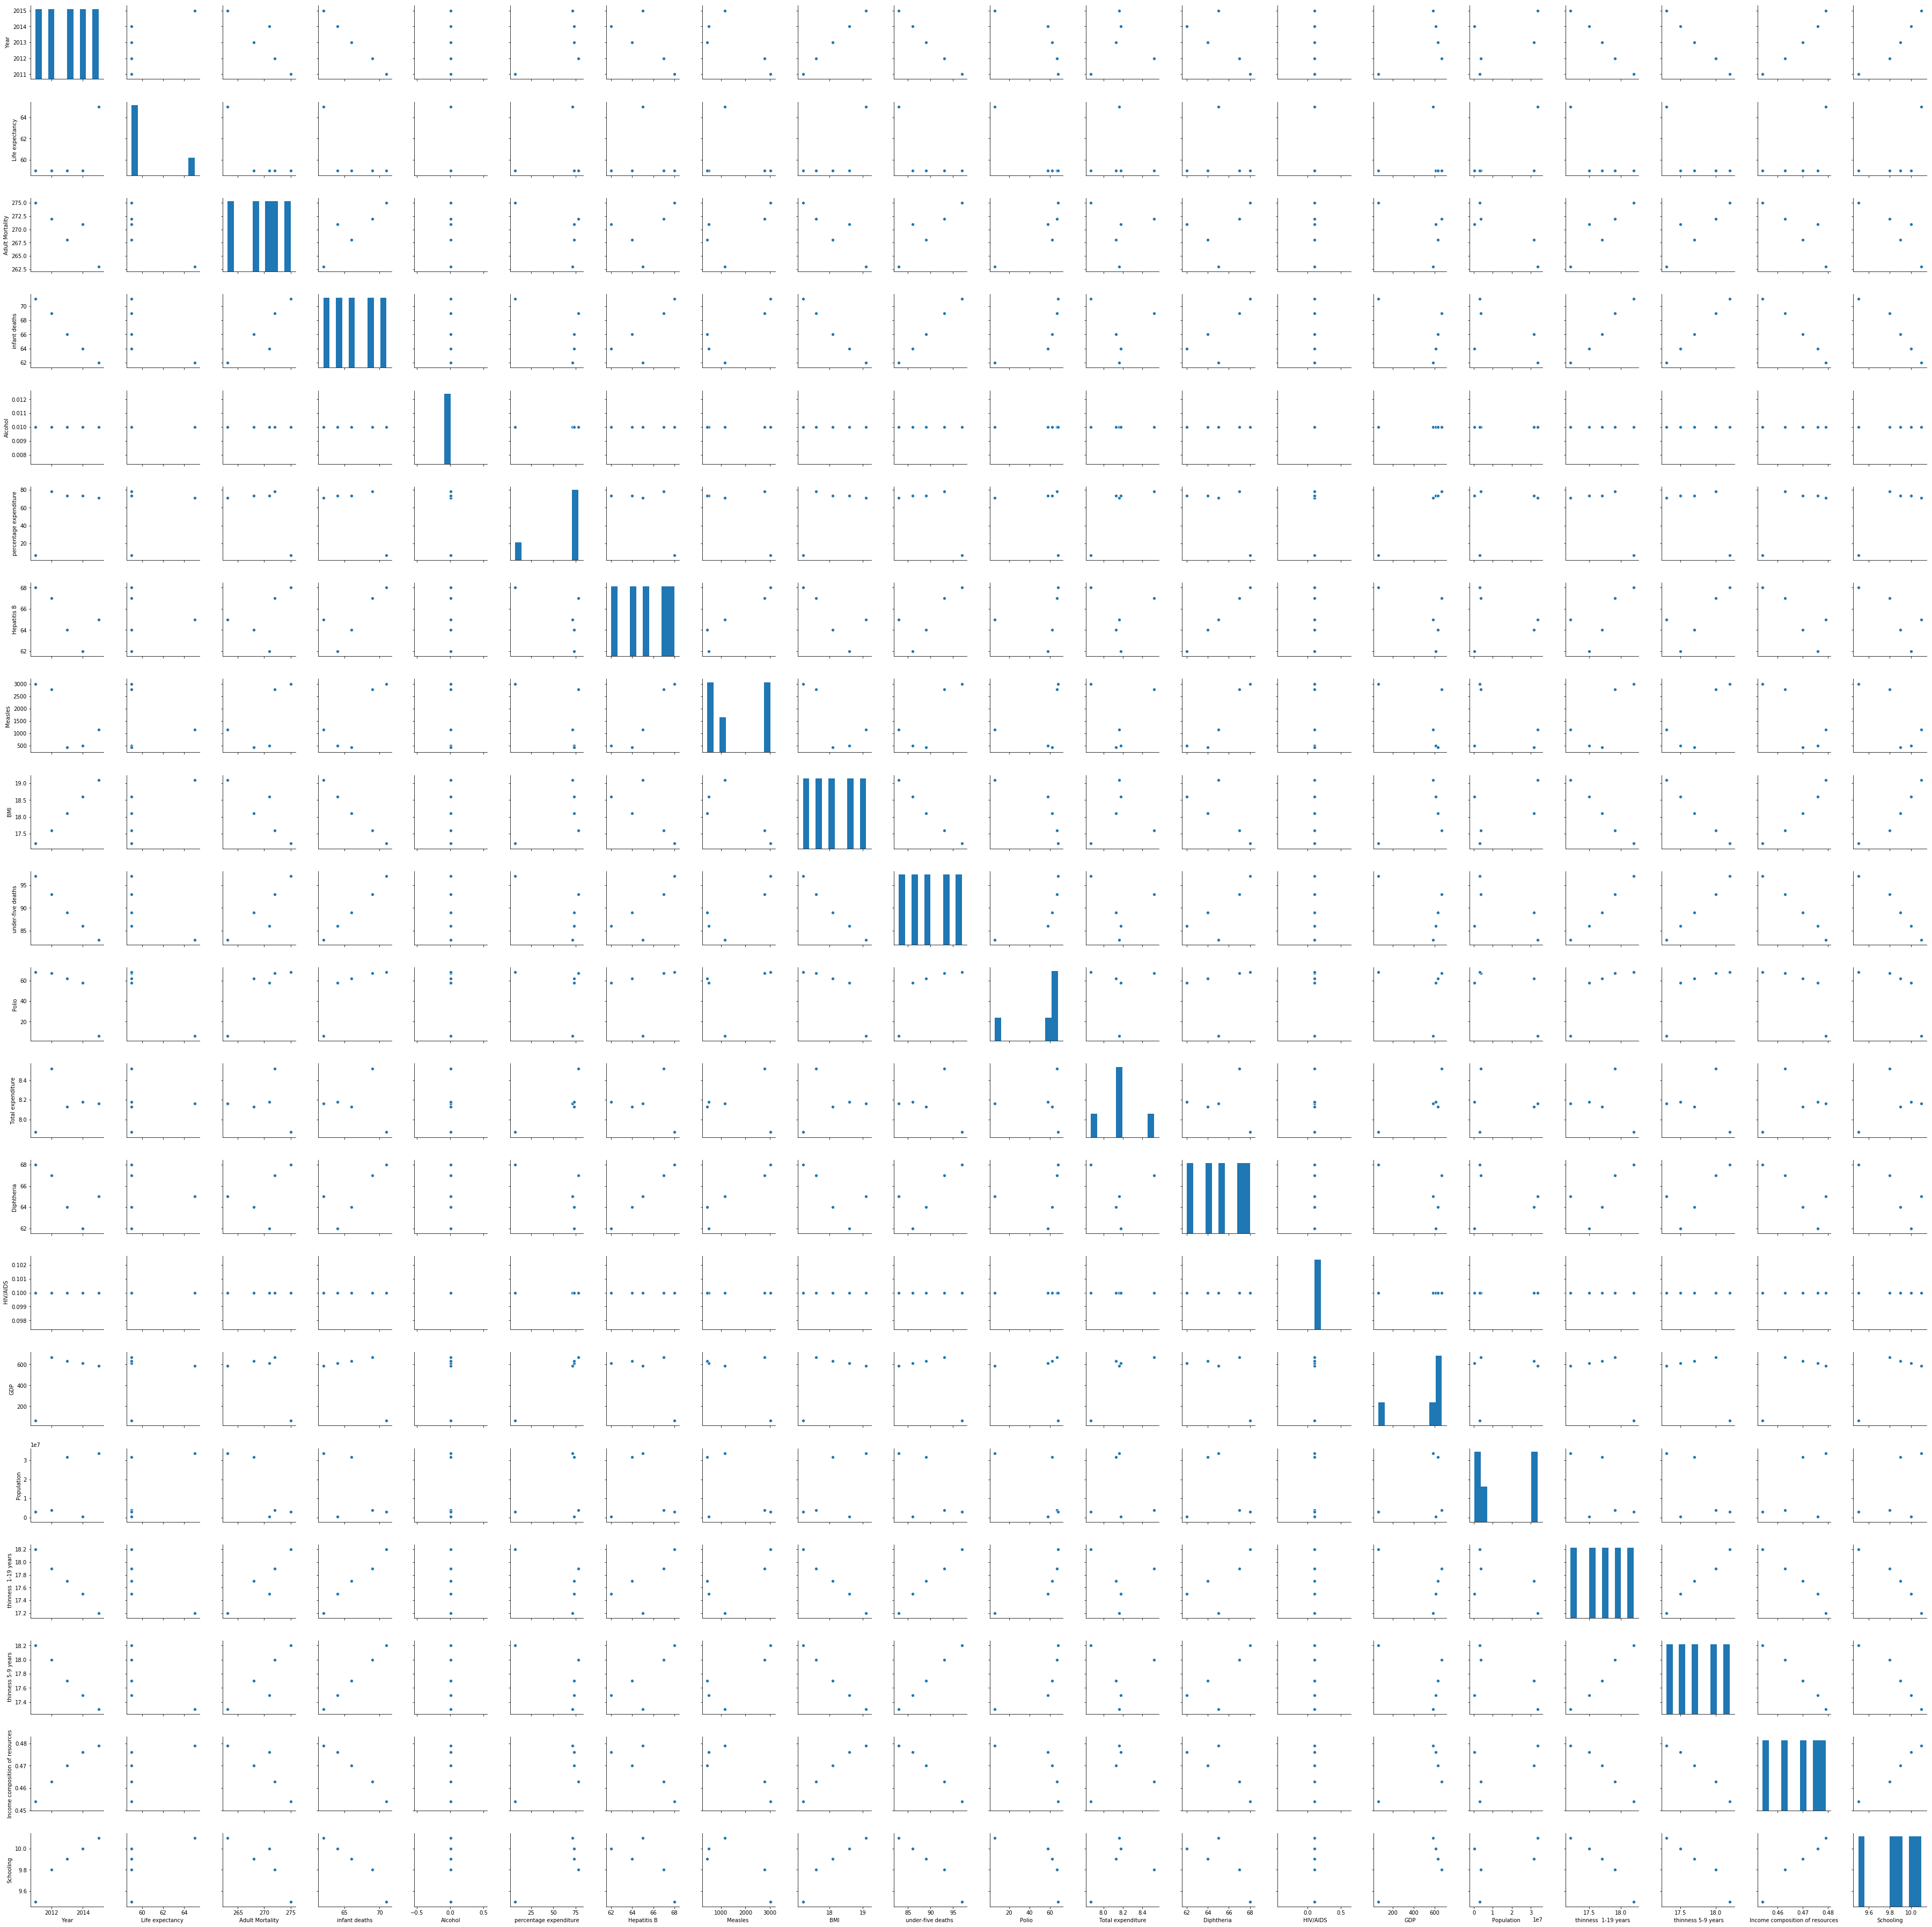

In [10]:
sns.pairplot(df.head())

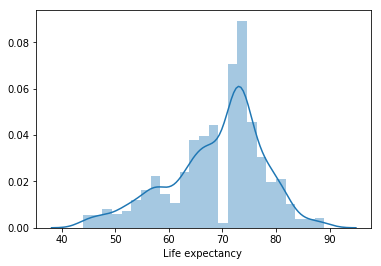

In [11]:
sns.distplot(df['Life expectancy '])

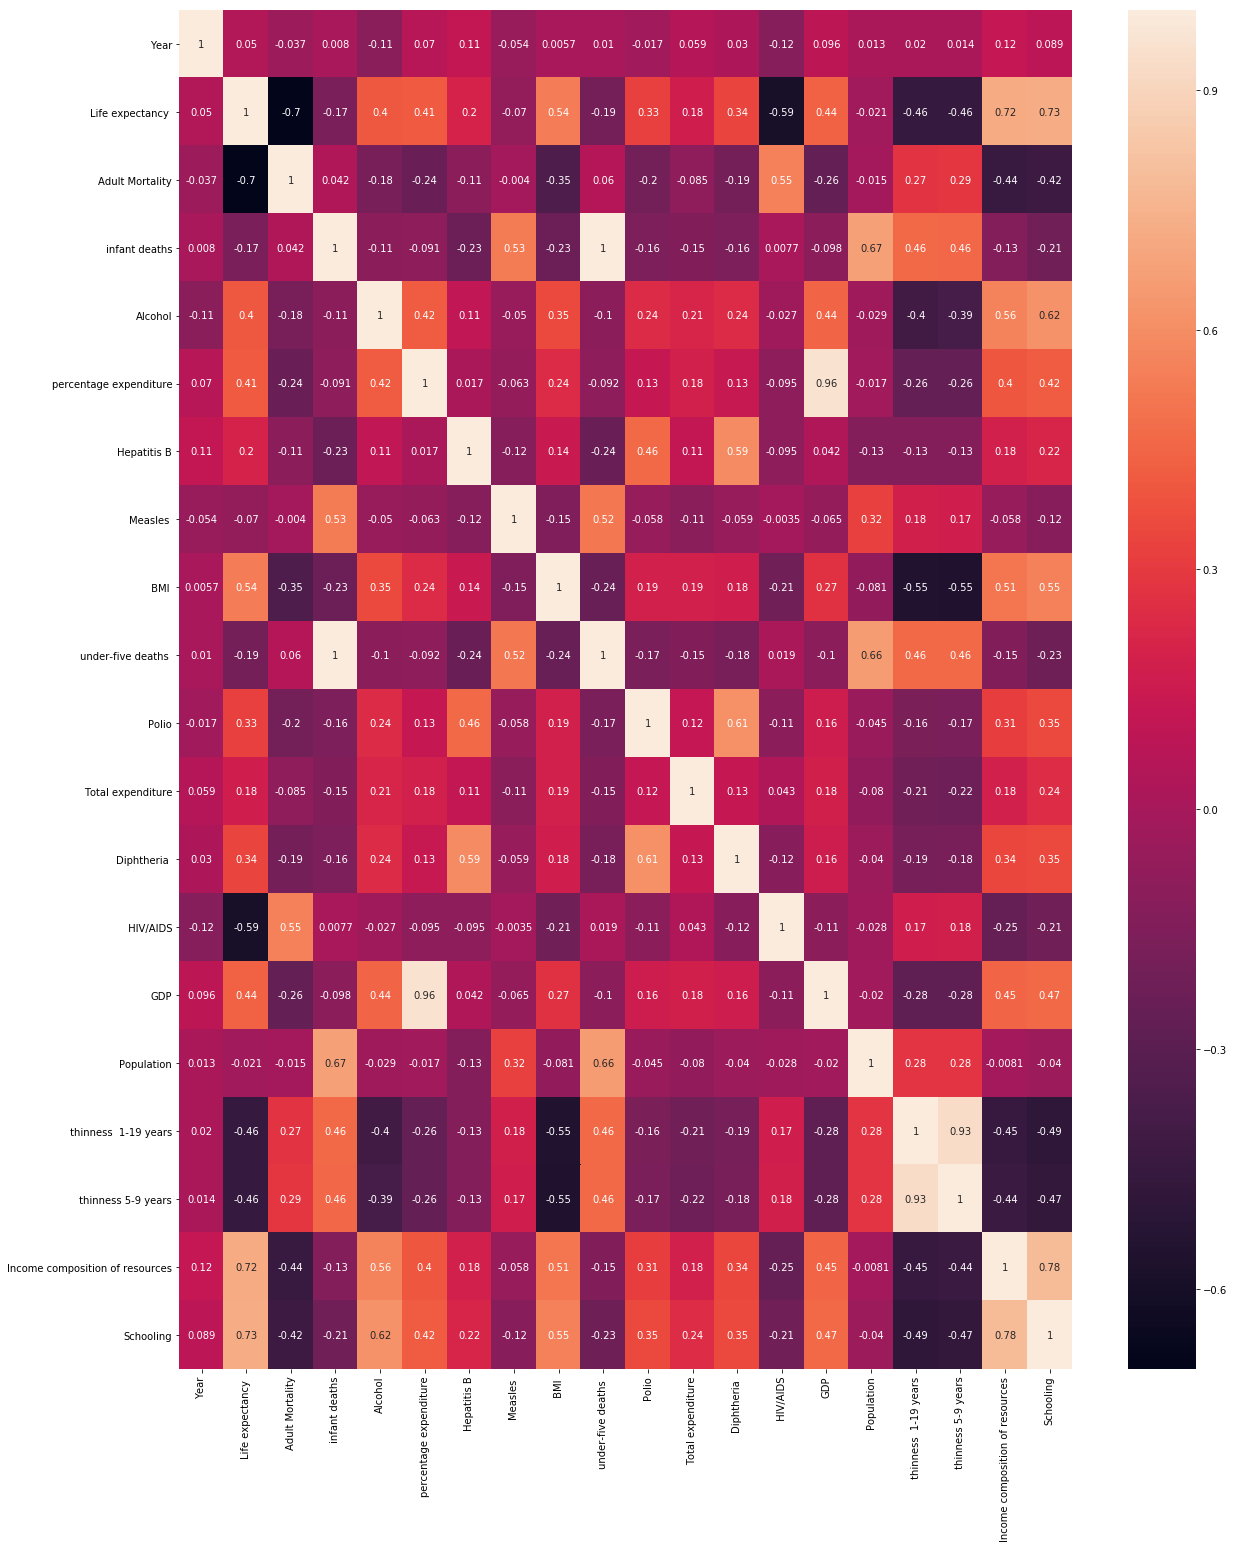

In [12]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True)

In [16]:
X=df[['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS',' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]

In [17]:
y=df['Life expectancy ']

In [19]:
#from sklearn.cross_validation import train_test_split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

lm.fit()

In [24]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
lm.coef_

array([-9.69610941e-02, -1.53467989e-02,  9.96286624e-02, -1.27220930e-01,
        4.98287211e-04, -5.98984723e-03, -1.82613099e-05,  2.30363897e-02,
       -7.38464964e-02,  9.10083989e-03,  2.38830531e-01,  2.16944537e-02,
       -4.52519018e-01,  6.20176943e-03, -1.11530866e-01,  1.08531139e+01,
        8.50600735e-01])

In [26]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

Coeff
Year                             -0.096961
Adult Mortality                  -0.015347
infant deaths                     0.099629
Alcohol                          -0.127221
percentage expenditure            0.000498
Hepatitis B                      -0.005990
Measles                          -0.000018
 BMI                              0.023036
under-five deaths                -0.073846
Polio                             0.009101
Total expenditure                 0.238831
Diphtheria                        0.021694
 HIV/AIDS                        -0.452519
 thinness  1-19 years             0.006202
 thinness 5-9 years              -0.111531
Income composition of resources  10.853114
Schooling                         0.850601

In [27]:
predict=lm.predict(X_test)

In [28]:
predict

array([73.13395452, 70.86831985, 79.42035055, 59.38797172, 59.71769332,
       67.70570431, 56.16401811, 84.05963534, 51.4839923 , 75.90254404,
       72.9947126 , 63.83286135, 71.50931369, 66.99795716, 76.89237661,
       67.58513752, 59.14391825, 56.43559748, 68.70008531, 70.81518862,
       76.01149274, 69.16678003, 77.09256145, 76.13327224, 75.87738107,
       60.62334282, 75.30241404, 50.61476346, 71.58123372, 55.28796692,
       73.48690938, 75.69284035, 47.06536505, 67.18657397, 70.13033298,
       79.7647223 , 68.51061861, 68.88674847, 66.85856134, 61.1560157 ,
       69.77978366, 69.37293977, 63.58081979, 72.39107776, 81.67518028,
       66.94449434, 72.05101373, 69.98222445, 71.75706604, 72.27392221,
       69.71581042, 63.58576052, 81.02583028, 50.41487696, 68.74561535,
       71.06188157, 71.3579438 , 76.76434697, 73.11266131, 53.85437887,
       77.40862044, 78.16029925, 75.6637602 , 65.99489636, 75.59407821,
       43.14647858, 77.28633374, 78.80514364, 66.74226959, 71.71

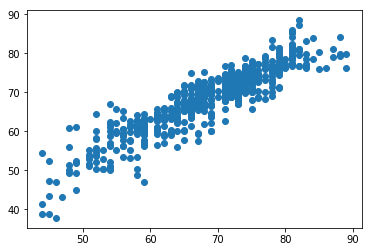

In [29]:
plt.scatter(y_test,predict)

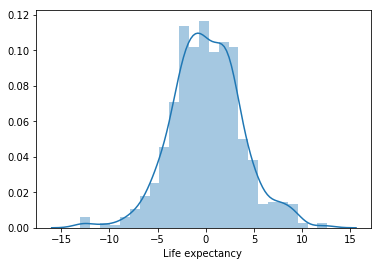

In [31]:
sns.distplot(y_test-predict)

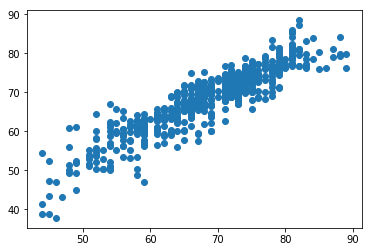

In [32]:
plt.scatter(y_test,predict)

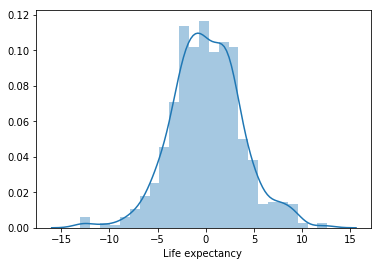

In [33]:
sns.distplot(y_test-predict)

In [34]:
!pip install watson-machine-learning-client

In [35]:
wml_credentials={
  "apikey": "KpMafMLpRNUe0khO6MFyxRfND-4HwGAnV7jufbfeGbJV",
  "instance_id": "7255ba67-f185-429d-8c09-a061e5789e0f",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [36]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
client = WatsonMachineLearningAPIClient( wml_credentials )

2020-06-08 13:18:08,613 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [37]:
model_props= {client.repository.ModelMetaNames.AUTHOR_NAME : "Jayesh",
             client.repository.ModelMetaNames.AUTHOR_EMAIL : "jayeshpandey67@gmail.com",
             client.repository.ModelMetaNames.NAME : "Life-Expectancy"}

In [38]:
model_artifact = client.repository.store_model(lm, meta_props=model_props)
published_model_uid = client.repository.get_model_uid(model_artifact)


In [ ]:
published_model_uid

In [42]:
client.deployments.list()

----  ----  ----  -----  -------  ---------  -------------
GUID  NAME  TYPE  STATE  CREATED  FRAMEWORK  ARTIFACT TYPE
----  ----  ----  -----  -------  ---------  -------------


In [44]:
deployment= client.deployments.create(published_model_uid, name='Life-Expectancy')
scoring_endpoints = client.deployments.get_scoring_url(deployment)



#######################################################################################

Synchronous deployment creation for uid: 'ee91da23-a8c6-4717-b3df-f316bd778d3c' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='12478e1e-59ed-4265-8c21-5b5f78f3df2e'
------------------------------------------------------------------------------------------------




In [45]:
scoring_endpoints = client.deployments.get_scoring_url(deployment)

scoring_endpoints

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/7255ba67-f185-429d-8c09-a061e5789e0f/deployments/12478e1e-59ed-4265-8c21-5b5f78f3df2e/online'